<a href="https://colab.research.google.com/github/Andres-Gress/EDP_II/blob/main/Metodoexplicito_dif_finitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación del calor

$\frac{\partial U}{\partial t}=\alpha\frac{\partial^2 U}{\partial x^2}$

Con $\quad 0<x<1 \quad$ y $\quad t\geq0$

$U(0,t)=U(1,t)=0$

$U(x,0)=\sin(\pi x)$

$h=0.1 \quad k_1=0.0005 \quad k_2=0.01$

Se tiene la solución exacta

$u(x,t)=e^{-\pi^2t}\sin(\pi x)$

Y se va a comparar cuando $t=0.5$

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Se requieren para hacer los calculos, graficar y presentar la tabla final

In [94]:
# Parámetros
L = 1.0
T = 0.5
alpha = 1.0

h = 0.1
k1 = 0.0005
k2 = 0.01

Nx = int(L / h)
Nt1 = int(T / k1)
Nt2 = int(T / k2)

Aquí definimos los valores de L, T (condiciones de frontera) y se calculan el total de puntos que habrá a lo largo del eje X
De igual manera se define $h$ y $k_1,k_2$ para ver la comparativa de ambos y ver la manera en que se comportan

In [95]:
def resolver_ec_calor(k, Nt, guardar_cada):
    r = alpha**2 * k / h**2
    x = np.linspace(0, L, Nx + 1)
    u = np.sin(np.pi * x)
    u[0] = 0
    u[-1] = 0
    u_nuevo = np.zeros_like(u)
    soluciones = [(0.0, u.copy())]

    for n in range(1, Nt + 1):
        for i in range(1, Nx):
            u_nuevo[i] = (1 - 2*r) * u[i] + r * (u[i + 1] + u[i - 1])
        u_nuevo[0] = 0
        u_nuevo[-1] = 0
        u[:] = u_nuevo[:]
        if n % guardar_cada == 0 or n == Nt:
            t_actual = n * k
            soluciones.append((t_actual, u.copy()))
    return x, soluciones

Definimos la función que resolverá numéricamente la EDP de calor

In [96]:
guardar_cada = 100

Con este valor se puede ver para diferentes saltos de t, ya que serián muchos resultados si se presenta 1 por 1, de modo que se dan saltos para hacer mas reducido el resultado

In [97]:
# Resolver para k1 y k2
x, sol_k1 = resolver_ec_calor(k1, Nt1, guardar_cada)
x, sol_k2 = resolver_ec_calor(k2, Nt2, guardar_cada)

x_analitico = np.linspace(0, L, 1000)

Aquí se llama la función definida anteriormente y se aplica para los dos casos diferentes del valor de $k$

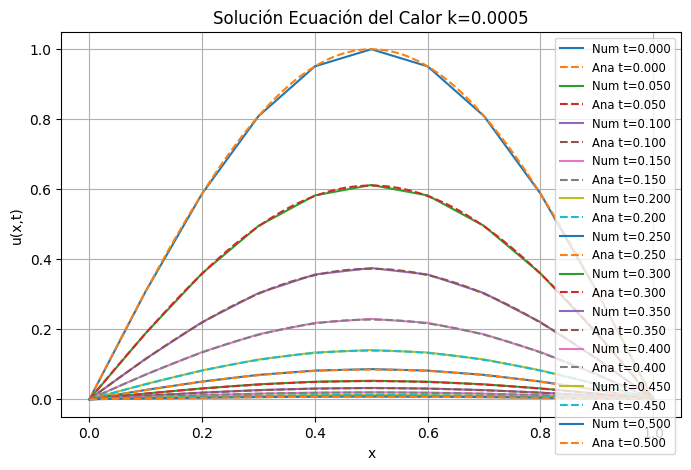

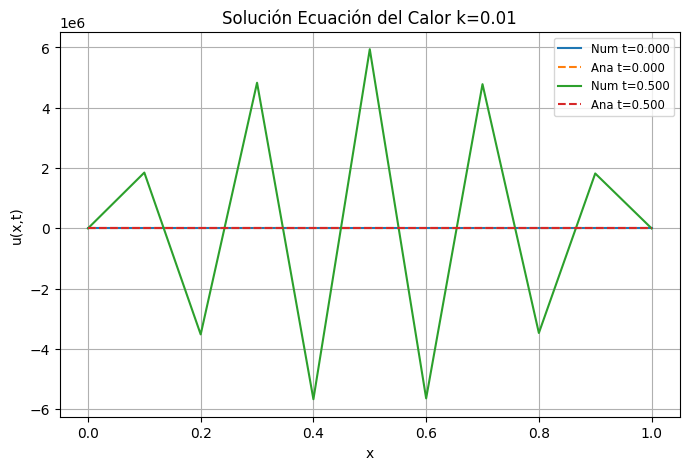

In [98]:
#Gráfica para k=0.0005
plt.figure(figsize=(8,5))
for t, u_num in sol_k1[::max(1, len(sol_k1)//10)]:
    u_ana = np.exp(-np.pi**2 * t) * np.sin(np.pi * x_analitico)
    plt.plot(x, u_num, label=f'Num t={t:.3f}')
    plt.plot(x_analitico, u_ana, '--', label=f'Ana t={t:.3f}')
plt.title('Solución Ecuación del Calor k=0.0005')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

#Gráfica para k=0.01
plt.figure(figsize=(8,5))
for t, u_num in sol_k2[::max(1, len(sol_k2)//10)]:
    u_ana = np.exp(-np.pi**2 * t) * np.sin(np.pi * x_analitico)
    plt.plot(x, u_num, label=f'Num t={t:.3f}')
    plt.plot(x_analitico, u_ana, '--', label=f'Ana t={t:.3f}')
plt.title('Solución Ecuación del Calor k=0.01')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

Gráficas por separado de ambos casos del valor de $K$
Y en cada gráfica se compara las curvas de la solución analítica contra la numerica

In [99]:
# Solución analítica exacta en t=0.5
u_analitica = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)

# Últimas soluciones numéricas (últimos pasos)
_, w_1000 = sol_k1[-1]
_, w_50 = sol_k2[-1]

# Errores absolutos
error_1000 = np.abs(u_analitica - w_1000)
error_50 = np.abs(u_analitica - w_50)

Para resolver la ecuación de manera analítica

In [100]:
tabla = pd.DataFrame({
    'x_i': x,
    'u(xi,0.5)': u_analitica,
    'w_{i,1000} (k=0.0005)': w_1000,
    '|u - w_1000|': error_1000,
    'w_{i,50} (k=0.01)': w_50,
    '|u - w_50|': error_50
})

print("\nTabla comparativa de soluciones numéricas vs analítica en t = 0.5:\n")
display(tabla.round(5))



Tabla comparativa de soluciones numéricas vs analítica en t = 0.5:



,x_i,"u(xi,0.5)","w_{i,1000} (k=0.0005)",|u - w_1000|,"w_{i,50} (k=0.01)",|u - w_50|
0,0.0,0.00000,0.00000,0.00000,0.00000e+00,0.00000e+00
1,0.1,0.00222,0.00229,0.00006,1.85063e+06,1.85063e+06
2,0.2,0.00423,0.00435,0.00012,-3.51599e+06,3.51599e+06
3,0.3,0.00582,0.00599,0.00017,4.83051e+06,4.83051e+06
4,0.4,0.00684,0.00704,0.00020,-5.66552e+06,5.66552e+06
5,0.5,0.00719,0.00740,0.00021,5.94182e+06,5.94182e+06
6,0.6,0.00684,0.00704,0.00020,-5.63650e+06,5.63650e+06
7,0.7,0.00582,0.00599,0.00017,4.78356e+06,4.78356e+06
8,0.8,0.00423,0.00435,0.00012,-3.46904e+06,3.46904e+06
9,0.9,0.00222,0.00229,0.00006,1.82161e+06,1.82161e+06


Tabla de valores donde se compara las soluciones para $t=0.5$
Notemos que cuando $k=0.01$ esta diverge.
Caso contrario en $k=0.0005$

Esto se debe al factor $r=\alpha^2\frac{k}{h^2}$

Y se tiene que:

Si $0 \leq r \leq 0.5$ entonces este converge porque tenemos un sistema estable, pero si $r>0.5$ es un sistema inestable, por lo que la solución numérica diverge.